In [1]:
import pandas as pd
import numpy as np

# 2 Data
Download the MNIST train and test data from github along with their corre- sponding label files. The train and test data consist of 6000 and 1000 binarized MNIST images respectively.

In [2]:
train_data = pd.read_csv("mnist_train_data.csv", header=None)
train_label = pd.read_csv("mnist_train_labels.csv", header=None, names=['label'])
test_data = pd.read_csv("mnist_test_data.csv", header=None)
test_label = pd.read_csv("mnist_test_labels.csv", header=None)

# 3 Generative Learning
Please don’t use the direct function from scikit-learn library for questions 1, 2, 3 and write your own implementation for them.

Question 1: Compute and report the prior probabilities πj for all labels. (10 marks)


In [3]:
pi_j = []
for i in np.unique(train_label):
    pi_j.append(sum(train_label['label']==i)/len(train_label))
    print ("Prior Probability of label:",i," = ",pi_j[i])


Prior Probability of label: 0  =  0.09866666666666667
Prior Probability of label: 1  =  0.11183333333333334
Prior Probability of label: 2  =  0.09683333333333333
Prior Probability of label: 3  =  0.10133333333333333
Prior Probability of label: 4  =  0.10383333333333333
Prior Probability of label: 5  =  0.08566666666666667
Prior Probability of label: 6  =  0.10133333333333333
Prior Probability of label: 7  =  0.1085
Prior Probability of label: 8  =  0.09183333333333334
Prior Probability of label: 9  =  0.10016666666666667


Question 2: For each pixel Xi and label j, compute Pji = P(Xi = 1|y = j) (Use the maximum likelihood estimate shown in class). Use Laplacian Smoothing for computing Pji. Report the highest Pji for each label j. (15 marks)

In [4]:
pji = []
for j in range(10):
    data = train_data[train_label['label']==j]
    p = []
    for i in range(784):
        p.append((sum(data[i]==1)+1)/(len(data)+2))
    pji.append(p)

for j in range(10):
    print ("Label",j," Highest Pji:",max(pji[j]))

Label 0  Highest Pji: 0.8518518518518519
Label 1  Highest Pji: 0.9851411589895989
Label 2  Highest Pji: 0.7289879931389366
Label 3  Highest Pji: 0.8081967213114755
Label 4  Highest Pji: 0.8496
Label 5  Highest Pji: 0.7112403100775194
Label 6  Highest Pji: 0.8491803278688524
Label 7  Highest Pji: 0.7947932618683001
Label 8  Highest Pji: 0.8752260397830018
Label 9  Highest Pji: 0.867330016583748


Question 3: Use naive bayes (as shown in lecture slides) to classify the test data. Report the accuracy. (5 marks)

In [5]:
nb = [[np.log(pi_j[j]) + sum(test_data.iloc[i]*np.log(pji[j]) + (1-test_data.iloc[i])*np.log(1-np.array(pji[j])))
         for j in range(10)]
            for i in range(len(test_data))]
        

In [6]:
test_pred = []
for i in range(len(nb)):
    test_pred.append(nb[i].index(max(nb[i])))

In [7]:
print ("Test Accuracy",((pd.DataFrame(test_pred)==test_label)[0].sum())/len(test_label))

Test Accuracy 0.809


Question 4: Compute the confusion matrix (as shown in the lectures) and report the top 3 pairs with most (absolute number) incorrect classifications. (10 marks)


In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
cnf_matrix = confusion_matrix(np.array(test_label[0]), np.array(test_pred))
print ("Confusion Matrix:")
print (cnf_matrix)


Confusion Matrix:
[[ 74   0   0   0   0   5   2   0   4   0]
 [  0 120   0   0   0   4   1   0   1   0]
 [  1   7  88   4   0   1   2   3   8   2]
 [  0   2   1  86   1   6   3   2   3   3]
 [  1   1   1   0  83   0   2   0   1  21]
 [  3   1   1  11   2  62   2   3   1   1]
 [  3   0   4   0   3   4  73   0   0   0]
 [  0   6   2   0   3   1   0  77   3   7]
 [  0   2   2   9   4   3   1   2  61   5]
 [  0   1   0   1   4   0   0   0   3  85]]


In [10]:
maximum = {}
for i in range(10):
    for j in range(10):
        if i!=j:
            #maximum[(i,j)] = confusion_matrix[i][j]
            maximum[cnf_matrix[i][j]] = (i,j)

In [11]:
print ("1st Most incorrect classification pair:",maximum[sorted(maximum)[-1]],"value:",sorted(maximum)[-1])
print ("2nd Most incorrect classification pair:",maximum[sorted(maximum)[-2]],"value:",sorted(maximum)[-2])
print ("3rd Most incorrect classification pair:",maximum[sorted(maximum)[-3]],"value:",sorted(maximum)[-3])

1st Most incorrect classification pair: (4, 9) value: 21
2nd Most incorrect classification pair: (5, 3) value: 11
3rd Most incorrect classification pair: (8, 3) value: 9


Question 5: Visualizing mistakes: Print two MNIST images from the test data that your classifier misclassified. Write both the true and predicted labels for both of these misclassified digits. (10 marks)

In [12]:
import matplotlib.pyplot as plt

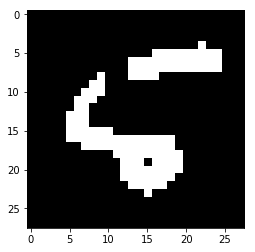

True Label 5
Predicted Label 4


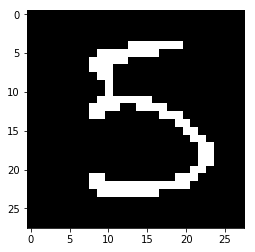

True Label 5
Predicted Label 3


In [13]:
plt.gray()
test_label_list = list(test_label[0].values)
count = 0
for i in range(len(test_pred)):
    if test_label_list[i]!=test_pred[i]:
        count = count + 1
        plt.imshow(np.reshape(test_data.iloc[i].values, (28,28)))
        plt.show()
        print ("True Label",test_label_list[i])
        print ("Predicted Label",test_pred[i])
        if count==2:
            break

Now, we will implement Gaussian Mixture Model and Linear Discriminant Analysis on the breast cancer data (sklearn.datasets.load breast cancer) available in sklean.datasets. Load the data and split it into train-validation-test (40-20-40 split). Don’t shuffle the data, otherwise your results will be different.


Question 6: Implement Gaussian Mixture model on the data as shown in class. Tune the covariance type parameter on the validation data. Use the selected value to compute the test accuracy. As always, train the model on train+validation data to compute the test accuracy. (10 mark)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

In [15]:
brest_cancer_data = load_breast_cancer()

In [16]:
bc_data_train_val, bc_data_test, bc_label_train_val, bc_label_test = train_test_split(brest_cancer_data.data, brest_cancer_data.target, test_size = 0.4, shuffle=False)

In [17]:
bc_data_train, bc_data_val, bc_label_train, bc_label_val = train_test_split(bc_data_train_val, bc_label_train_val, test_size=0.33, shuffle=False)

In [18]:
# Model
for cov in ['full', 'tied', 'diag', 'spherical']:
    clf = GaussianMixture(n_components=2, covariance_type=cov, random_state=0)  
    clf.means_init = np.array([bc_data_train[bc_label_train == i].mean(axis=0) for i in range(2)])
    clf.fit(bc_data_train)

    pred_val = clf.predict(bc_data_val)
    #print (clf.covariances_.shape)
    print ('Validation accuracy for covariance type '+ cov + ' = ' + str(accuracy_score(bc_label_val, pred_val)))

Validation accuracy for covariance type full = 0.911504424778761
Validation accuracy for covariance type tied = 0.8584070796460177
Validation accuracy for covariance type diag = 0.9469026548672567
Validation accuracy for covariance type spherical = 0.9734513274336283


Based on the above results, covariance_type = 'spherical' is choosen

In [19]:
# Best for spherical

clf = GaussianMixture(n_components=2, covariance_type='spherical', random_state=0) 
clf.means_init = np.array([bc_data_train_val[bc_label_train_val == i].mean(axis=0) for i in range(2)])

clf.fit(bc_data_train_val)
pred_test = clf.predict(bc_data_test)
print ('Test accuracy = ' + str(accuracy_score(bc_label_test, pred_test)))

Test accuracy = 0.9385964912280702


Question 7: Apply Linear Discriminant Analysis model on the train+validation data and report the accuracy obtained on test data. Report the transformation matrix (w) along with the intercept. (5 mark)

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_breast_cancer

brest_cancer_data = load_breast_cancer()
bc_data_train_val, bc_data_test, bc_label_train_val, bc_label_test = train_test_split(brest_cancer_data.data, brest_cancer_data.target, test_size = 0.4, shuffle=False)

# Intialize
clf = LinearDiscriminantAnalysis()
# Train
clf.fit(bc_data_train_val, bc_label_train_val)
# Test
pred_test = clf.predict(bc_data_test)

# print the accuracy
print ('Test accuracy = ' + str(np.sum(pred_test == bc_label_test)/len(bc_label_test)))

Test accuracy = 0.9736842105263158


In [21]:
print ("Transformation matrix:\n",clf.scalings_)
print ("\nIntercept:\n",clf.intercept_)

Transformation matrix:
 [[ 1.44850540e+00]
 [-5.78558342e-02]
 [-1.63287905e-01]
 [-2.41591226e-03]
 [-1.47998227e+01]
 [ 2.02002879e+01]
 [-1.35274499e+00]
 [-9.28332478e+00]
 [ 4.70449033e+00]
 [-1.20819489e+01]
 [-2.28593080e+00]
 [-6.86881771e-02]
 [ 1.57174631e-01]
 [ 2.87696014e-03]
 [-7.62195534e+01]
 [-7.13914326e-01]
 [ 1.15732894e+01]
 [-4.54646862e+01]
 [ 3.43973413e+00]
 [ 5.46385722e+01]
 [-9.62759711e-01]
 [-1.96127587e-02]
 [-1.50437998e-02]
 [ 6.50322727e-03]
 [ 3.77295366e+00]
 [ 2.82494809e-01]
 [-1.64540854e+00]
 [-4.01125170e+00]
 [-4.42138568e+00]
 [-2.18611650e+01]]

Intercept:
 [50.95842876]


# 4 Evaluating Classifiers
Question 8: Load the digits dataset (scikit-learn’s toy dataset) and take the last 1300 samples as your test set. Train a K-Nearest Neighbor (k=5, linf distance) model and then without using any scikit-learn method, report the final values for Specificity, Sensitivity, TPR, TNR, FNR, FPR, Precision and Recall for Digit 3 (this digit is a positive, everything else is a negative). (15 marks)

In [22]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier

In [23]:
digits_data = load_digits()

In [24]:
digits_train = digits_data['data'][0:len(digits_data['data'])-1300]
digits_train_label = digits_data['target'][0:len(digits_data['target'])-1300]
digits_test = digits_data['data'][len(digits_data['data'])-1300:]
digits_test_label = digits_data['target'][len(digits_data['target'])-1300:]

In [25]:
clf = KNeighborsClassifier(5, p=np.inf)
clf.fit(digits_train, digits_train_label)

pred_test = clf.predict(digits_test)
print ('accuracy = ' + str(np.sum(pred_test == digits_test_label)/(len(digits_test_label))))

accuracy = 0.8938461538461538


In [26]:
confusion_matrix = np.zeros((10,10))

for i in range(len(pred_test)):
    confusion_matrix[digits_test_label[i]][pred_test[i]] = confusion_matrix[digits_test_label[i]][pred_test[i]] + 1


In [27]:
print ("Confusion Matrix:\n\n", confusion_matrix.astype(int))

Confusion Matrix:

 [[126   0   0   0   1   0   0   0   0   0]
 [  1  90  23   1   0   0   3   0  11   1]
 [  2   0 120   4   0   0   0   0   1   1]
 [  0   1   4 113   0   1   0   2   2   7]
 [  3   1   0   0 118   1   5   1   3   1]
 [  1   0   0   5   0 121   4   0   0   1]
 [  0   0   0   0   0   0 129   0   1   0]
 [  0   0   0   0   0   1   0 128   0   1]
 [  1   6   8   0   0   2   1   1 107   2]
 [  1   9   0   3   0   4   0   2   3 110]]


In [28]:
confusion_matrix_digit_3 = np.matrix([[confusion_matrix[3][3], sum(confusion_matrix[3])-confusion_matrix[3][3]], \
               [sum(confusion_matrix[:,3])-confusion_matrix[3][3], confusion_matrix.sum()-sum(confusion_matrix[3])-sum(confusion_matrix[:,3])+confusion_matrix[3][3]]])


In [29]:
df_confusion_matrix_digit_3 = pd.DataFrame(confusion_matrix_digit_3, columns=['Pred_3','Pred_not_3'], index=['Actual_3','Actual_not_3'], dtype=int)
df_confusion_matrix_digit_3

,Pred_3,Pred_not_3
Actual_3,113,17
Actual_not_3,13,1157


In [30]:
df_confusion_matrix_digit_3 = pd.DataFrame(confusion_matrix_digit_3, columns=['Positive','Negative'], index=['True','False'], dtype=int)
df_confusion_matrix_digit_3

,Positive,Negative
True,113,17
False,13,1157


In [31]:
Specificity = confusion_matrix_digit_3[1,1]/confusion_matrix_digit_3[1].sum()
Sensitivity = confusion_matrix_digit_3[0,0]/confusion_matrix_digit_3[0].sum()
Precision = confusion_matrix_digit_3[0,0]/confusion_matrix_digit_3[:,0].sum()

In [32]:
TPR = confusion_matrix_digit_3[0,0]/confusion_matrix_digit_3[0].sum()
TNR = confusion_matrix_digit_3[1,1]/confusion_matrix_digit_3[1].sum()
FNR = confusion_matrix_digit_3[0,1]/confusion_matrix_digit_3[0].sum()
#FNR=1-TPR
FPR = confusion_matrix_digit_3[1,0]/confusion_matrix_digit_3[1].sum()
Recall = TPR

In [33]:
print ("Specificity:",Specificity)
print ("Sensitivity:",Sensitivity)
print ("Precision:",Precision)
print ("TPR:",TPR)
print ("TNR:",TNR)
print ("FNR:",FNR)
print ("FPR:",FPR)
print ("Recall:",Recall)

Specificity: 0.9888888888888889
Sensitivity: 0.8692307692307693
Precision: 0.8968253968253969
TPR: 0.8692307692307693
TNR: 0.9888888888888889
FNR: 0.13076923076923078
FPR: 0.011111111111111112
Recall: 0.8692307692307693



# 5 Regression
An ablation experiment consists of removing one feature from an experiment, in order to assess the amount of additional information that feature provides above and beyond the others. For this section, we will use the diabetes dataset from scikit-learn’s toy datasets. Split the data into training and testing data as a 90-10 split with random state of 10.


In [34]:
from sklearn.datasets import load_diabetes

In [35]:
diabetes_data = load_diabetes()

In [36]:
diabetes_data_train, diabetes_data_test, diabetes_data_label_train, diabetes_data_label_test = train_test_split(diabetes_data.data, diabetes_data.target, test_size = 0.1, random_state=10)

Question 9: Perform least squares regression on this dataset. Report the mean squared error and the mean absolute error on the test data. (5 marks)

In [37]:
# Least squares regression
theta,residuals,rank,s = np.linalg.lstsq(diabetes_data_train, diabetes_data_label_train, rcond=None)

In [38]:
# Make predictions on the test data
predictions = np.dot(diabetes_data_test, theta)
# Let's see the output on training data as well, to see the training error
y_true_pred = np.dot(diabetes_data_train, theta)
# MSE calculation
from sklearn.metrics import mean_squared_error
print (mean_squared_error(diabetes_data_label_test, predictions))
#print (mean_squared_error(diabetes_data_label_train, y_true_pred))

28060.62255931054


In [39]:
# MAE calculation
from sklearn.metrics import mean_absolute_error
print (mean_absolute_error(diabetes_data_label_test, predictions))
#print (mean_absolute_error(diabetes_data_label_train, y_true_pred))

160.8439534334583


Question 10: Repeat the experiment from Question 10 for all possible values of ablation (i.e., removing the feature 1 only, then removing the feature 2 only, and so on). Report all MSEs. (10 marks)

In [40]:
for i in range(10):
    data = pd.DataFrame(diabetes_data_train)
    del data[i]
    data = np.array(data)
    theta,residuals,rank,s = np.linalg.lstsq(data, diabetes_data_label_train, rcond=None)
    diabetes_train_pred = np.dot(data, theta)
    print ("Feature removed:",i,"  MSE:",mean_squared_error(diabetes_data_label_train, diabetes_train_pred))

Feature removed: 0   MSE: 25835.45614572961
Feature removed: 1   MSE: 25963.509410892115
Feature removed: 2   MSE: 26117.78113034645
Feature removed: 3   MSE: 25932.067639245513
Feature removed: 4   MSE: 25837.2062805149
Feature removed: 5   MSE: 25837.11626632769
Feature removed: 6   MSE: 25849.17168725327
Feature removed: 7   MSE: 25835.828130257145
Feature removed: 8   MSE: 25920.1352209274
Feature removed: 9   MSE: 25846.88235000444


Question 11: Based on the MSE values obtained from Question 11, which features do you deem the most/least significant and why? (5 marks)


In [41]:
data = pd.DataFrame(diabetes_data_train)
#data_test = pd.DataFrame(diabetes_data_test)
del data[0], data[4], data[5], data[7], data[9]
#del data_test[0], data_test[7], data_test[4], data_test[5], data_test[9]
data = np.array(data)
#data_test = np.array(data_test)
theta,residuals,rank,s = np.linalg.lstsq(data, diabetes_data_label_train, rcond=None)
diabetes_train_pred = np.dot(data, theta)
print ("Features Removed [0, 4, 5, 7, 9] MSE:",mean_squared_error(diabetes_data_label_train, diabetes_train_pred))
#diabetes_test_pred = np.dot(data_test, theta)
#print ("Test MSE:",mean_squared_error(diabetes_data_label_test, diabetes_test_pred))

Features Removed [0, 4, 5, 7, 9] MSE: 25851.38584730351


In [42]:
data = pd.DataFrame(diabetes_data_train)
#data_test = pd.DataFrame(diabetes_data_test)
del data[1], data[2], data[3], data[6], data[8]
#del data_test[0], data_test[7], data_test[4], data_test[5], data_test[9]
data = np.array(data)
#data_test = np.array(data_test)
theta,residuals,rank,s = np.linalg.lstsq(data, diabetes_data_label_train, rcond=None)
diabetes_train_pred = np.dot(data, theta)
print ("Features Removed [1, 2, 3, 6, 8] MSE:",mean_squared_error(diabetes_data_label_train, diabetes_train_pred))
#diabetes_test_pred = np.dot(data_test, theta)
#print ("Test MSE:",mean_squared_error(diabetes_data_label_test, diabetes_test_pred))

Features Removed [1, 2, 3, 6, 8] MSE: 27048.113570844143


In [43]:
print ("From the Above Analysis for the Most significant features MSE increased a lot and for Least significant features MSE didnt increase much")
print ("Most Significant feature : [1, 2, 3, 6, 8]")
print ("Least Significant feature: [0, 4, 5, 7, 9]")

From the Above Analysis for the Most significant features MSE increased a lot and for Least significant features MSE didnt increase much
Most Significant feature : [1, 2, 3, 6, 8]
Least Significant feature: [0, 4, 5, 7, 9]
